In [ ]:
from utility import * # file contenente i datasets
import pandas as pd
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import geopandas as gpd
from PIL import Image

In [2]:
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.JPG")]
    frame_one = frames[0]
    frame_one.save("Dati_Cinema_Italiani/plots/incassi_regioni.gif", format="GIF", append_images=frames,
               save_all=True, duration=1000, loop=0)

In [3]:
italy_map = gpd.read_file('italian-maps-shapefiles-master/italian-maps-shapefiles-master/italy-with-regions/reg2011_g.shp')
italy_map.loc[italy_map['COD_REG'] == 8, 'NOME_REG'] = 'EMILIA ROMAGNA'

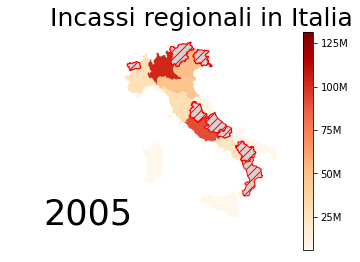

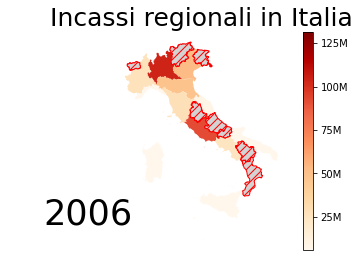

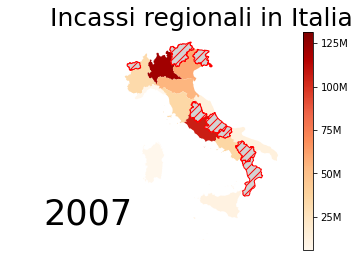

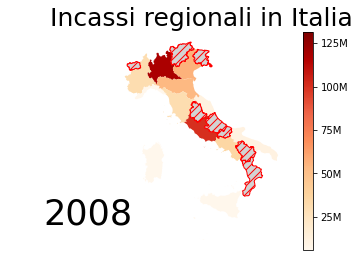

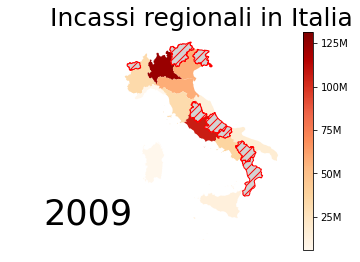

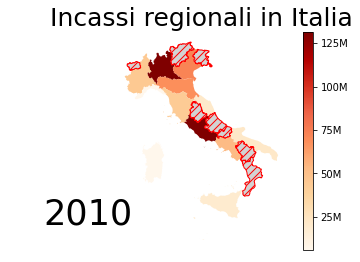

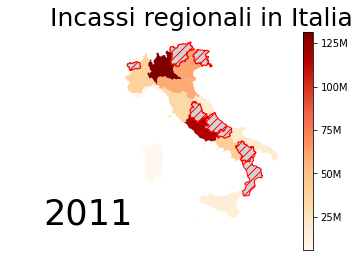

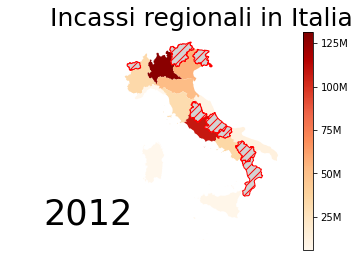

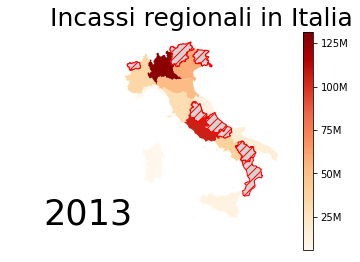

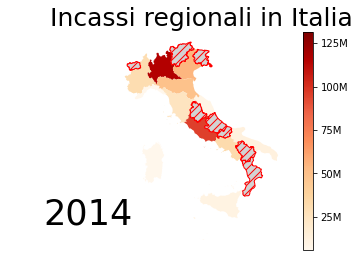

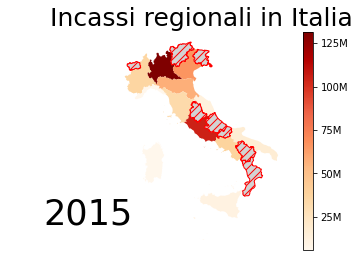

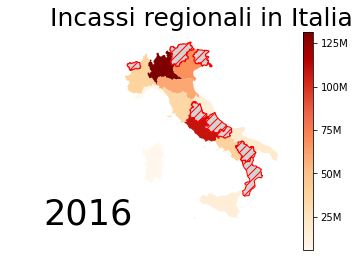

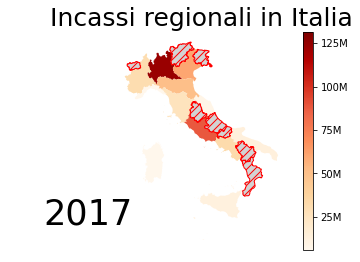

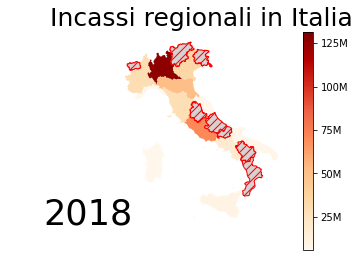

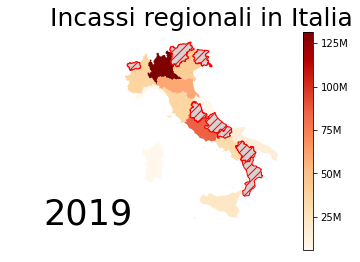

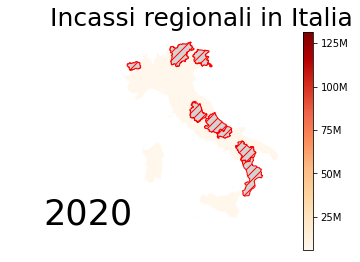

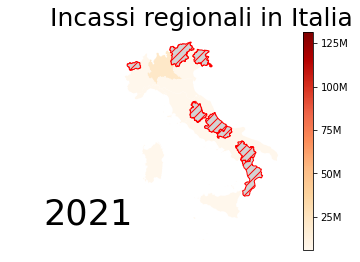

In [4]:
# creo immagini JPG
output_path = 'Dati_Cinema_Italiani/plots/maps'
i = 0
years = range(2005, 2022)
vmin, vmax = 25000000, 125000000
for year in years:
    reg_y = regioni[regioni['Year'] == year]
    reg_y = reg_y.rename(columns={'Regione':'NOME_REG'})[['Year','NOME_REG','Incasso','Presenze']]
    merge_y = italy_map.merge(reg_y, on='NOME_REG', how='outer')
    
    # plotto la mappa
    fig = merge_y.plot(
        column='Incasso',
        cmap='OrRd',
        vmin=vmin, vmax=vmax,
        norm=plt.Normalize(vmin=vmin, vmax=vmax),
        legend=True,
        categorical=False,
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "Missing values",
        }
    )
    fig.axis('off')
    fig.set_title('Incassi regionali in Italia', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # modifico la legenda
    yticks = np.arange(0, vmax+50000000, step=25000000)
    colourbar = fig.get_figure().get_axes()[1]
    ticks_loc = colourbar.get_yticks().tolist()
    colourbar.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    colourbar.set_yticklabels(['{:1.0f}M'.format(ytick*0.000_001) for ytick in yticks])
    
    # inserisco l'anno nella figure
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # salvo la figura
    filepath = os.path.join(output_path, str(year)+'_incasso_regionale.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, format='jpeg', dpi=300)

In [5]:
make_gif(output_path)